<a href="https://colab.research.google.com/github/menna03/US_Accidents_Dec21_updated_Data-Cleaning-/blob/main/US_Accidents_Dec21_updated1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
us = pd.read_csv("US_Accidents_Dec21_updated.csv")

In [ ]:
np.round((us.isna().sum()/us.shape[0])*100)

ID                        0.0
Severity                  0.0
Start_Time                0.0
End_Time                  0.0
Start_Lat                 0.0
Start_Lng                 0.0
End_Lat                   0.0
End_Lng                   0.0
Distance(mi)              0.0
Description               0.0
Number                   85.0
Street                    0.0
Side                      0.0
City                      0.0
County                    0.0
State                     0.0
Zipcode                   0.0
Country                   0.0
Timezone                  0.0
Airport_Code              0.0
Weather_Timestamp         1.0
Temperature(F)            2.0
Wind_Chill(F)            86.0
Humidity(%)               2.0
Pressure(in)              2.0
Visibility(mi)            2.0
Wind_Direction            1.0
Wind_Speed(mph)          16.0
Precipitation(in)        93.0
Weather_Condition         2.0
Amenity                   0.0
Bump                      0.0
Crossing                  0.0
Give_Way  

we can see that there are some values that has alot of null values so we will delete it (Number ,Wind_Chill(F) ,Precipitation(in) ) all have more than 30% null

In [ ]:
del us["Number"]
del us["Wind_Chill(F)"]
del us["Precipitation(in)"]

In [ ]:
np.round((us.isna().sum()/us.shape[0])*100)

ID                        0.0
Severity                  0.0
Start_Time                0.0
End_Time                  0.0
Start_Lat                 0.0
Start_Lng                 0.0
End_Lat                   0.0
End_Lng                   0.0
Distance(mi)              0.0
Description               0.0
Street                    0.0
Side                      0.0
City                      0.0
County                    0.0
State                     0.0
Zipcode                   0.0
Country                   0.0
Timezone                  0.0
Airport_Code              0.0
Weather_Timestamp         1.0
Temperature(F)            2.0
Humidity(%)               2.0
Pressure(in)              2.0
Visibility(mi)            2.0
Wind_Direction            1.0
Wind_Speed(mph)          16.0
Weather_Condition         2.0
Amenity                   0.0
Bump                      0.0
Crossing                  0.0
Give_Way                  0.0
Junction                  0.0
No_Exit                   0.0
Railway   

In [ ]:
rows = us.isna().sum(axis=1)
print('we have ', rows[rows >= 12].shape[0], ' rows that contian more than 12 null values')
rows[rows >= 12]

we have  0  rows that contian more than 12 null values


Series([], dtype: int64)

In [ ]:
idexes_to_drop = rows[rows >= 12].index
df = us.drop(index=idexes_to_drop)

In [ ]:
us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14272 entries, 0 to 14271
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     14272 non-null  object 
 1   Severity               14272 non-null  int64  
 2   Start_Time             14272 non-null  object 
 3   End_Time               14272 non-null  object 
 4   Start_Lat              14272 non-null  float64
 5   Start_Lng              14272 non-null  float64
 6   End_Lat                14272 non-null  float64
 7   End_Lng                14272 non-null  float64
 8   Distance(mi)           14272 non-null  float64
 9   Description            14272 non-null  object 
 10  Street                 14272 non-null  object 
 11  Side                   14272 non-null  object 
 12  City                   14272 non-null  object 
 13  County                 14272 non-null  object 
 14  State                  14272 non-null  object 
 15  Zi

In [ ]:
us["ID"]=us["ID"].apply(lambda x: x[2:])
# we remove the A- from the list 

In [ ]:
us["ID"]

0            1
1            2
2            3
3            4
4            5
         ...  
14267    14268
14268    14269
14269    14270
14270    14271
14271    14272
Name: ID, Length: 14272, dtype: object

so we can see that the ID needed to be corrected and we will  remove A- from it 
and most of the other data is corecct 
but we can see that there are some data has a ########### in it and we don't need it so we will delete this columns(Start_Time,End_Time)

In [ ]:
del us["Start_Time"]
del us["End_Time"]
del us["Weather_Timestamp"]

In [ ]:
us.columns 

Index(['ID', 'Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Description', 'Street', 'Side', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
us["Temperature(F)"] = us["Temperature(F)"].apply(lambda x: x if type(x) != type('') else int(x.replace('61.793555921 ', '')))
us[ "Pressure(in)"] = us[ "Pressure(in)"].apply(lambda x: x if type(x) != type('') else int(x.replace('29.472 ', '')))
us["Visibility(mi)"] = us["Visibility(mi)"].apply(lambda x: x if type(x) != type('') else int(x.replace('9.09 ', '')))
us[ "Wind_Speed(mph)"] = us[ "Wind_Speed(mph)"].apply(lambda x: x if type(x) != type('') else int(x.replace('7.39 ', '')))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

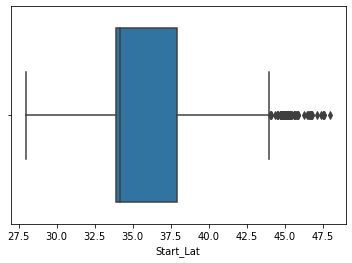

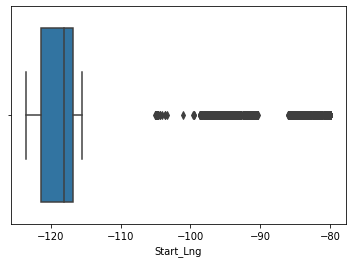

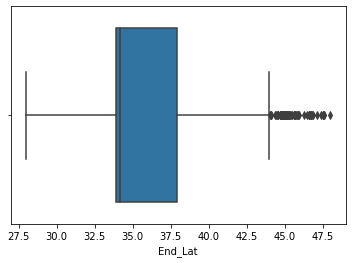

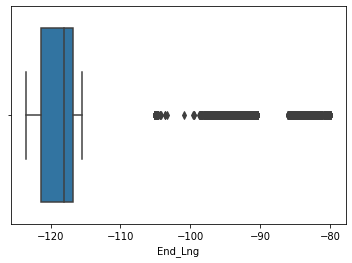

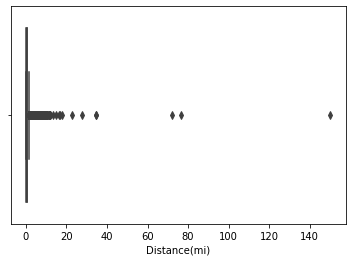

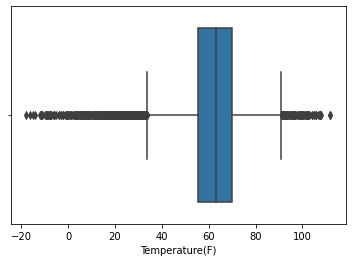

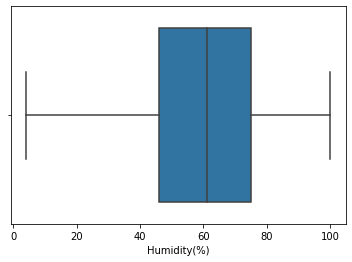

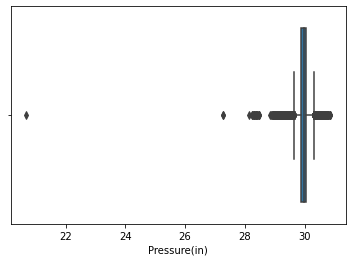

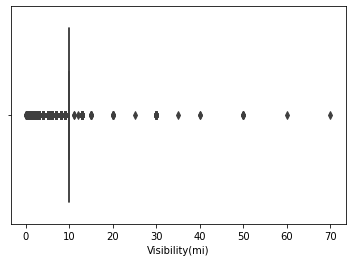

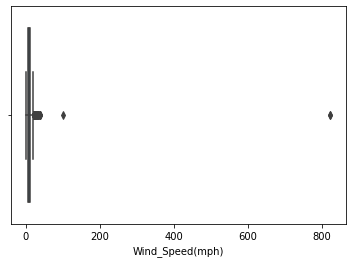

In [ ]:
cols = ['Distance(mi)',"Temperature(F)","Humidity(%)","Pressure(in)","Visibility(mi)","Wind_Speed(mph)"]
for col in cols:
    sns.boxplot(data=us, x=col)
    plt.show()

as we can see that most data has alot of outliers ( 'Distance(mi)',"Temperature(F)","Pressure(in)","Visibility(mi)","Wind_Speed(mph)")istane so we will use  quartiles

In [ ]:
us.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,14272.000000,14272.000000,14272.000000,14272.000000,14272.000000,14272.000000,14035.000000,14019.000000,14042.000000,14000.000000,11957.000000
mean,2.258268,35.852564,-112.769367,35.852658,-112.769223,0.616808,60.199266,59.908410,29.981374,9.298493,9.501313
std,0.546873,3.117609,12.266673,3.117727,12.267008,1.891907,16.788112,20.713394,0.219584,2.463743,11.520965
min,2.000000,27.970969,-123.526160,27.971260,-123.526160,0.000000,-18.000000,4.000000,20.670000,0.000000,0.000000
25%,2.000000,33.881810,-121.379716,33.881422,-121.379567,0.160000,55.400000,46.000000,29.890000,10.000000,5.800000
50%,2.000000,34.178890,-118.097240,34.181125,-118.098300,0.387000,63.000000,61.000000,29.970000,10.000000,9.200000
75%,2.000000,37.931180,-116.856762,37.932377,-116.853560,0.606000,69.800000,75.000000,30.060000,10.000000,11.500000
max,4.000000,48.005390,-80.005270,47.995395,-79.958150,150.138000,111.900000,100.000000,30.860000,70.000000,822.800000


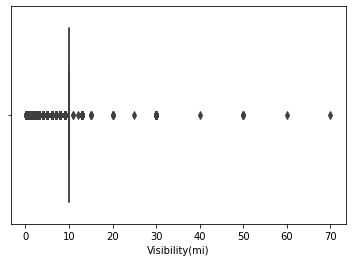

In [ ]:
q75, q25 = np.percentile(us.loc[:, "Visibility(mi)"], [75, 25])
intr_qr = q75 - q25

max = q75 + (1.5 * intr_qr)
min = q25 - (1.5 * intr_qr)

quartiles_us1 = df.copy()
quartiles_us1.loc[quartiles_us1["Visibility(mi)"] < min, "Visibility(mi)"] = np.nan
quartiles_us1.loc[quartiles_us1["Visibility(mi)"] > max,"Visibility(mi)"] = np.nan
quartiles_us1 = quartiles_us1.dropna()
sns.boxplot(data=quartiles_us1, x= "Visibility(mi)")

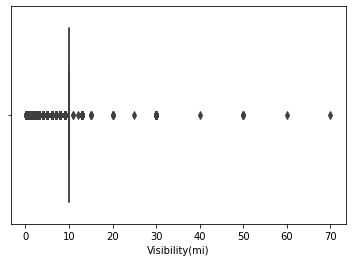

In [ ]:
sns.boxplot(data=quartiles_us1, x= "Visibility(mi)")


now we can get an accurate number of /accidents in the US/ and we dropped the distance because there was an extreme value and the deistance affect the data 

In [ ]:
q75, q25 = np.percentile(us.loc[:, "Visibility(mi)"], [75, 25])
intr_qr = q75 - q25

max = q75 + (1.5 * intr_qr)
min = q25 - (1.5 * intr_qr)

quartiles_us1 = df.copy()
quartiles_us1.loc[quartiles_us1['Distance(mi)'] < min, 'Distance(mi)'] = np.nan
quartiles_us1.loc[quartiles_us1['Distance(mi)'] > max, 'Distance(mi)'] = np.nan
quartiles_us1 = quartiles_us1.dropna()

In [ ]:
us.describe()

Now we can conclued any thing we want from the data 